# ロジスティック回帰（疑似データ）
### モデルの定義
- モデルパラメータ（重み）：$\mathbf{w} = (w_0, w_1, w_2, \dots, w_p)^{\mathrm{T}} $
- モデルへの入力：$\mathbf{x} = (1, x_1, x_2, \dots, x_p)^{\mathrm{T}} $
- 以上の2つが与えられたときのモデルの出力（確率値）：$\hat{Y}(\mathbf{x}; \mathbf{w}) =  f(\mathbf{w}^{\mathrm{T}} \mathbf{x})$
  - $f$はシグモイド関数：$f(x) = \frac{1}{1 + \exp(-x)}$

## 1. ライブラリの読み込み

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 勾配降下法（SGD）を使う分類モデル（ロジスティック回帰など）
from sklearn.linear_model import SGDClassifier
# 分類モデルの評価指標
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
# 標準化を行うためのクラス
from sklearn.preprocessing import StandardScaler

## 2. 疑似データの分類（その①）
- 単純な2値分類用のデータを用意
- 説明変数は2次元
### 2-1. 疑似データの作成
- np.random.multivariate_normal(mean, cov, size):多変量正規分布に従う乱数を生成
    - mean: 分布の平均
    - cov: 分散共分散行列
    - size: サンプルサイズ

In [18]:
# 乱数シードの固定
np.random.seed(1234)

# 1つ目のカテゴリに属する2次元データを20個生成
# 両次元とも平均0、分散4
data1 = np.random.multivariate_normal((0, 0), [[4,0],[0,4]], 20)
label1 = np.zeros(len(data1)) # ラベルは0とする

# 2つ目のカテゴリに属する2次元データを20個生成
# 両次元とも平均0、分散4
data2 = np.random.multivariate_normal((4, 4), [[4,0],[0,4]], 20)
label2 = np.ones(len(data2)) # ラベルは1とする

### 2-2. データの可視化

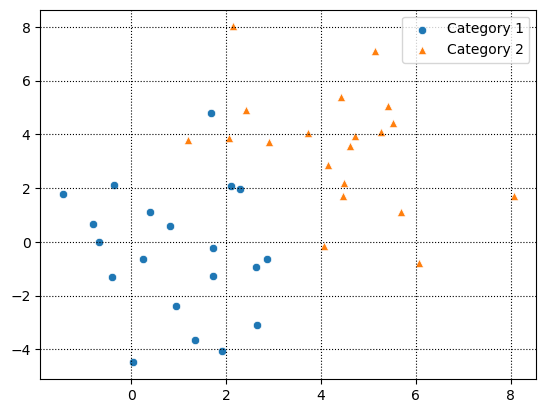

In [19]:
# グリッドの表示
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
# 散布図の表示
sns.scatterplot(x=data1[:, 0], y=data1[:, 1], marker='o', color='C0', label='Category 1')
sns.scatterplot(x=data2[:, 0], y=data2[:, 1], marker='^', color='C1', label='Category 2')
# 凡例の位置を調整
plt.legend(loc='best')
plt.show()

### 2-3. モデルの学習
- SGDClassifier: ロジスティック回帰など、勾配降下法を用いる分類モデルを実装
   - loss: 使用する損失関数を指定
   - penalty: 正則化の種類を指定
   - max_iter: 最大のイテレーション回数（エポック数）を指定
   - fit_intercept: 切片を計算するかどうかを指定
   - random_state: 再現性を確保するための乱数シードを指定
   - tol: 収束判定のための許容誤差を指定

In [5]:
# scikit-learnに渡すため、2つのデータを結合する
X = np.concatenate([data1, data2])
y = np.concatenate([label1, label2])
# ロジスティック回帰モデルをインスタンス化
clf = SGDClassifier(loss='log_loss', max_iter=10000,
                    fit_intercept=True, random_state=1234, tol=1e-3)
# モデルを学習させる
clf.fit(X, y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
print("w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}".format(w0, w1, w2))

w0 = -4.187, w1 = 10.838, w2 = 7.047


### 2-4. 分類境界の表示
- 分類境界の求め方
    - ①分類境界は$\hat{Y}(\mathbf{x}; \mathbf{w}) = f(\mathbf{w}^{\mathrm{T}} \mathbf{x}) = 0.5$となる部分を示している
    - ②シグモイド関数$f$は、入力として $0$ が与えられたとき$f(0) = 0.5$ を取る
    - ①と②より、分類境界を表す式は $ w_0 + w_1 x_1 + w_2 x_2 = 0$ である
- 直線を表示する方法
    - $w_0 + w_1 x_1 + w_2 x_2 = 0$ を $x_2$ について解くと、$x_2 = - \frac{w_1}{w_2} x_1 - \frac{w_0}{w_2}$が得られる
    
    - この式に沿って $x_1$（横軸の値）を変化させて、対応する $x_2$（縦軸の値）を求める
    - 求めた $x_1$ と $x_2$ のペアを座標として用いて、直線をプロットする

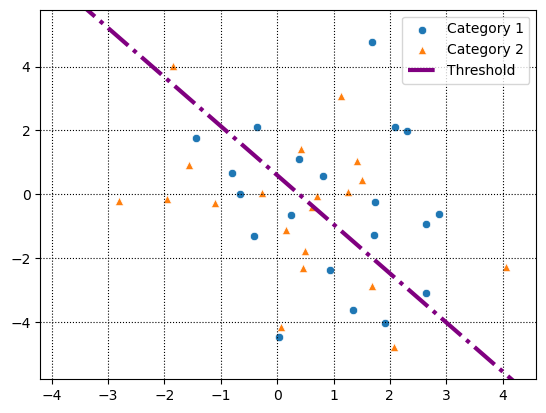

In [6]:
# グリッドの表示
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
# データの散布図を表示
sns.scatterplot(x=data1[:, 0], y=data1[:, 1], marker='o', color='C0', label='Category 1')
sns.scatterplot(x=data2[:, 0], y=data2[:, 1], marker='^', color='C1', label='Category 2')

# 説明変数をx1とx2に分離
x1, x2 = X[:, 0], X[:, 1]
# 分類境界上にある点のx1座標（横軸の値）を計算
line_x = np.arange(np.min(x1) - 1, np.max(x1) + 1)
# 分類境界上にある点のx2座標（縦軸の値）を計算
line_y = - line_x * w1 / w2 - w0 / w2
# 分類境界を直線として表示（紫色の点線）
sns.lineplot(x=line_x, y=line_y, linestyle='-.', 
             linewidth=3, color='purple', label='Threshold')

# グラフの表示範囲を調整
plt.ylim([np.min(x2) - 1, np.max(x2) + 1])
# 凡例の表示位置を調整
plt.legend(loc='best')
plt.show()

### 2-5. モデルの性能を確認
- 予測値
- 対数尤度
- 正解率（Accuracy）（詳しくは第3章で扱う）
- 混同行列（詳しくは第3章で扱う）

#### 2-5-1. 予測値の算出

In [7]:
# ラベルを予測
y_est = clf.predict(X)
print('---予測ラベル---')
print(y_est) # （データ数, ）の1次元配列

# 確率値を得る
y_est_proba = clf.predict_proba(X)
print('---確率値---')
print(y_est_proba) # (データ数, クラス数)の二次元配列．
                   # 1列目はラベル0である確率，2列目はラベル1である確率を意味する

---予測ラベル---
[0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1.]
---確率値---
[[9.99978627e-01 2.13732297e-05]
 [1.75500725e-10 1.00000000e+00]
 [9.99326876e-01 6.73124410e-04]
 [4.17187905e-03 9.95828121e-01]
 [1.00000000e+00 3.99856348e-16]
 [8.88178420e-16 1.00000000e+00]
 [9.99993915e-01 6.08510348e-06]
 [9.99988789e-01 1.12111792e-05]
 [1.70460878e-04 9.99829539e-01]
 [6.60230107e-02 9.33976989e-01]
 [9.99999982e-01 1.81457126e-08]
 [4.06950723e-04 9.99593049e-01]
 [1.91252379e-08 9.99999981e-01]
 [9.99999737e-01 2.62656434e-07]
 [1.14696949e-03 9.98853031e-01]
 [9.99682492e-01 3.17507709e-04]
 [3.55271368e-15 1.00000000e+00]
 [2.71898528e-06 9.99997281e-01]
 [9.97607078e-01 2.39292157e-03]
 [0.00000000e+00 1.00000000e+00]
 [9.99972970e-01 2.70296906e-05]
 [1.00000000e+00 6.62107992e-15]
 [9.99989457e-01 1.05425922e-05]
 [9.98987376e-01 1.01262449e-03]
 [2.44901024e-07 9.99999755e-01]
 [9.98227941e-01 1.77205896e-0

#### 2-5-2. 対数尤度の確認

- 対数尤度 $\ln{P(\mathbf{w})}= \sum_{n=1}^N \{ y^{(n)} \ln{\hat{y}^{(n)}}+(1-y^{(n)}) \ln{(1-\hat{y}^{(n)})} \} $
- [log_loss()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html): 負の対数尤度 $-\ln{P(\mathbf{w})}$ を計算

In [8]:
# 対数尤度は-∞から0の値を返す（0に近いほど当てはまりがよい）
# log_lossは「負の」対数尤度を計算する関数であるため、- をつけて戻している
# normalizeという引数をTrueのままにしておくと、合計の対数尤度ではなく平均の対数尤度が計算されるので注意
# 対数尤度の計算には確率値を使う
print('対数尤度 = {:.3f}'.format(-log_loss(y, y_est_proba, normalize=False))) 

# 自分で対数尤度を計算
# epsilonの使い方が異なるので、微妙に結果が変わる
l = 0
epsilon = 1e-15 # アンダーフローを防ぐための定数
for i in range(len(y)):
    l += y[i] * np.log(y_est_proba[i,1] + epsilon) + (1 - y[i]) * np.log(y_est_proba[i,0] + epsilon)
print('対数尤度 = {:.3f}'.format(l))

対数尤度 = -383.574
対数尤度 = -379.256


#### 2-5-3. 正解率と混同行列の確認
- [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html): 正解率（Accuracy）を計算
- [confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html): 混同行列を作成

In [9]:
# 正解率(Accuracy)を表示
print('正解率 = {}%'.format(100 * accuracy_score(y, y_est)))

# 混同行列を表示
conf_mat = pd.DataFrame(
    confusion_matrix(y, y_est), 
    index=['正解 = 0', '正解 = 1'], 
    columns=['予測値 = 0', '予測値 = 1'])
conf_mat

正解率 = 42.5%


,予測値 = 0,予測値 = 1
正解 = 0,9,11
正解 = 1,12,8


## 3. 疑似データを用いた分類（その②）

* 中古住宅の疑似データを再利用する
    * Price : 値段(百万円)
    * AreaSize : 土地面積($\mathrm{m}^2$)
    * HouseSize : 家面積($\mathrm{m}^2$)
    * PassedYear : 経過年数(年)
    * Train : 電車での最寄り駅から主要駅までの所要時間(分)
    * Walk : 徒歩での最寄り駅から家までの所要時間(分)

### 3-1. 疑似データの作成
- 分類問題に落とし込むために、Priceに閾値を設けてカテゴリ変数に変換

In [10]:
df_house = pd.DataFrame({
        "Price":[24.8, 59.5, 7, 7.5, 9.8, 13.5, 14.9, 27, 27, 28, 28.5, 23, 12.9, 18, 23.7, 29.8, 17.8, 5.5, 8.7, 10.3, 14.5, 17.6, 16.8],
        "AreaSize":[98.4, 379.8, 58.6, 61.5, 99.6, 76.2, 115.7, 165.2, 215.2, 157.8, 212.9, 137.8, 87.2, 139.6, 172.6, 151.9, 179.5, 50, 105, 132, 174, 176, 168.7],
        "HouseSize":[74.2, 163.7, 50.5, 58, 66.4, 66.2, 59.6, 98.6, 87.4, 116.9, 96.9, 82.8, 75.1, 77.9, 125, 85.6, 70.1, 48.7, 66.5, 51.9, 82.3, 86.1, 80.8],
        "PassedYear":[4.8, 9.3, 13, 12.8, 14, 6, 14.7, 13.6, 13.3, 6.7, 3.1, 10.3, 11.6, 10.5, 3.8, 5.4, 4.5, 14.6, 13.7, 13, 10.3, 4.4, 12.8],
        "Train":[5, 12, 16, 16, 16, 16, 16, 16, 16, 16, 16, 19, 23, 23, 23, 28, 32, 37, 37, 37, 37, 37, 41],
        "Walk":[6, 12, 2, 1, 5, 1, 4, 2, 7, 6, 5, 20, 8, 3, 5, 4, 2, 3, 11, 6, 18, 10, 2]
    })
df_house.index.name="id"

# 目的変数をカテゴリに変換
# Priceの値を2000万以上なら1，そうでなければ0に変更
df_house['Price'] = df_house['Price'] >= 20
df_house.head()

,Price,AreaSize,HouseSize,PassedYear,Train,Walk
id,,,,,,
0,True,98.4,74.2,4.8,5,6
1,True,379.8,163.7,9.3,12,12
2,False,58.6,50.5,13.0,16,2
3,False,61.5,58.0,12.8,16,1
4,False,99.6,66.4,14.0,16,5


In [11]:
df_house.describe()

,AreaSize,HouseSize,PassedYear,Train,Walk
count,23.000000,23.000000,23.000000,23.000000,23.000000
mean,144.139130,81.356522,9.834783,23.260870,6.217391
std,70.086095,26.436955,4.023071,10.247915,5.062846
min,50.000000,48.700000,3.100000,5.000000,1.000000
25%,99.000000,66.300000,5.700000,16.000000,2.500000
50%,139.600000,77.900000,10.500000,19.000000,5.000000
75%,173.300000,86.750000,13.150000,34.500000,7.500000
max,379.800000,163.700000,14.700000,41.000000,20.000000


### 3-2.データの前処理
- 説明変数を2つに絞る
- [StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) を用いて標準化（詳しくは第6章で扱う）を実施

In [12]:
# 正解データ作成
y = df_house["Price"].values
# 学習用データ作成（説明変数を2つに絞る）
X = df_house[["AreaSize", "Train"]].values

# 各特徴量を平均0，分散1となるように変換（標準化）するためのクラス
# 今回のデータセットは特徴量の平均や分散がそれぞれで大きく異なるため、
# そのままでは確率値がうまく算出されない
std_scaler = StandardScaler() 

# 標準化した特徴量X_scaledを得る
# 以降はX_scaledをモデルの学習等に使う
X_scaled = std_scaler.fit_transform(X)

### 3-3. モデルの学習

In [13]:
# ロジスティック回帰モデルをインスタンス化
clf = SGDClassifier(loss='log_loss', max_iter=10000, 
                    fit_intercept=True, random_state=1234, tol=1e-3)
# モデルを学習させる
clf.fit(X_scaled, y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
print("w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}".format(w0, w1, w2))

w0 = -1.688, w1 = 23.292, w2 = -24.392


### 3-4. 分類境界の表示

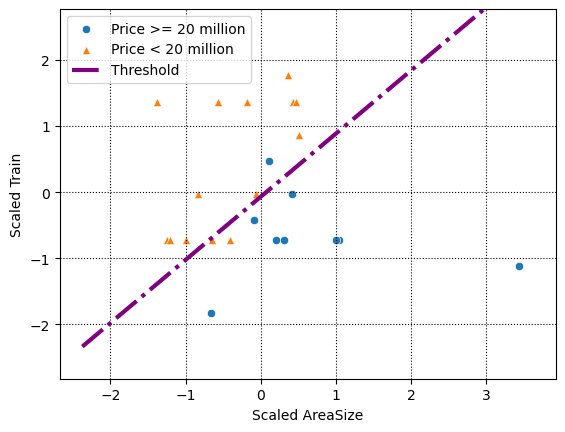

In [14]:
# 説明変数をx1とx2に分離
x1 = X_scaled[:,0] # 標準化されたAreaSize
x2 = X_scaled[:,1] # 標準化されたTrain

# グリッドの表示
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
# 正解ラベル（配列y）の値が1であるデータの散布図
sns.scatterplot(x=x1[y], y=x2[y], marker='o', color='C0', 
                label='Price >= 20 million')
# 正解ラベル（配列y）の値が0であるデータの散布図
sns.scatterplot(x=x1[~y], y=x2[~y], marker='^', color='C1', 
                label='Price < 20 million')

# 分類境界上にある点のx1座標（横軸の値）を計算
line_x = np.arange(np.min(x1) - 1, np.max(x1) + 1)
# 分類境界上にある点のx2座標（縦軸の値）を計算
line_y = - line_x * w1 / w2 - w0 / w2
# 分類境界を直線として表示（紫色の点線）
plt.plot(line_x, line_y, linestyle='-.', 
         linewidth=3, color='purple', label='Threshold')

# グラフの表示範囲を調整
plt.ylim([np.min(x2) - 1, np.max(x2) + 1])
# 凡例の表示位置を調整
plt.legend(loc='best')

# 軸ラベルの設定
plt.xlabel("Scaled AreaSize")
plt.ylabel("Scaled Train")
plt.show()

### 3-5. モデルの性能を確認
- 予測値
- 対数尤度
- 正解率（Accuracy）
- 混同行列

#### 3-5-1. 予測値の算出

In [15]:
# ラベルを予測
y_est = clf.predict(X_scaled)

# 確率値を得る
y_est_proba = clf.predict_proba(X)

#### 3-5-2. 対数尤度の確認

In [16]:
# log_lossは「負の」対数尤度を計算する関数であるため、- をつけて戻している
# normalizeという引数をTrueのままにしておくと、合計の対数尤度ではなく平均の対数尤度が計算されるので注意
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est_proba, normalize=False))) 

# 自分で対数尤度を計算
# epsilonの使い方が異なるので、微妙に結果が変わる
l = 0
epsilon = 1e-15 # アンダーフローを防ぐための定数
for i in range(len(y)):
    l += y[i] * np.log(y_est_proba[i,1] + epsilon) + (1 - y[i]) * np.log(y_est_proba[i,0] + epsilon)
print('対数尤度 = {:.3f}'.format(l))

対数尤度 = -504.611
対数尤度 = -483.543


#### 3-5-3.正解率と混同行列の確認

In [17]:
# 正解率を表示
print('正解率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

# 混同行列の表示
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['正解 = 2000万未満', '正解 = 2000万以上'], 
                        columns=['予測 = 2000万未満', '予測 = 2000万以上'])
conf_mat

正解率 = 86.957%


,予測 = 2000万未満,予測 = 2000万以上
正解 = 2000万未満,12,2
正解 = 2000万以上,1,8
